<a href="https://colab.research.google.com/github/Edugera/collection/blob/master/A_nuvem_Ichimoku_e_estrat%C3%A9gia_de_negocia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Site: https://blog.quantinsti.com/ichimoku-cloud-trading-strategy/

#A nuvem Ichimoku e estratégia de negociação
Indicadores Técnicos

Por Vibhu Singh e Ashish Garg

O indicador de nuvem Ichimoku é um indicador técnico de origem japonesa e foi um indicador proprietário com seu formulador japonês por cerca de 30 anos.

Trata-se de calcular cinco linhas de curta a média duração na alta, baixa e de fechamento dos preços de um título e traçar uma área, entre duas dessas cinco linhas, mais conhecida como nuvem Ichimoku .

Essas linhas ajudam a determinar a direção, o momento e os níveis de resistência de suporte para os dados da série temporal . O indicador de nuvem Ichimoku também gera sinais de negociação de compra e venda e geralmente é plotado junto com o castiçal para permitir uma melhor tomada de decisão e gráficos mais claros.

Os cálculos para as linhas são simples e o período de tempo escolhido é um tanto arbitrário:

Tenkan Sen ou linha de conversão: (máximo de 20 períodos + mínimo de 20 períodos) / 2
Kijun Sen ou linha de base: (60-período-máximo + 60-período-mínimo) / 2
Senkou Sen A ou Span Principal A: (Linha de Base + Linha de Conversão) / 2
Senkou Sen B ou Leading Span B: (120-período-máximo + 120-período-mínimo) / 2
Período de Chikou ou Atraso: (perto de 30 períodos atrás)
A direção da ação do preço
A nuvem Ichimoku é formada entre o Leading Span A e o Leading Span B e ajuda a determinar a força e a direção da ação do preço.

Por exemplo, a direção ou tendência da ação do preço é de alta quando os preços estão acima da nuvem Ichimoku. Da mesma forma, a direção da ação do preço é para baixo quando os preços estão abaixo da nuvem Ichimoku e a direção é plana quando os preços estão em algum lugar na nuvem Ichimoku.

A força da ação do preço
A Força pode ser estimada usando a diferença entre as linhas Leading Span A e B. Quando o Leading Span A está aumentando e acima da outra linha de span, o aumento na diferença significa força na tendência de alta.

Isso também significa que a nuvem Ichimoku está ficando mais espessa. Da mesma forma, o crescimento do intervalo principal B sobre a outra linha do intervalo significa força na tendência de baixa e a espessura da nuvem Ichimoku aumenta novamente, embora na direção oposta.


In [3]:
pip install yfinance

     |████████████████████████████████| 6.3MB 10.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=c7540e8dac415fdb0a2baf6b92c43ce36e2e698a685b712de6d9aa41f56912a5
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
# Importar pacotes
import  pandas  as  pd
import  matplotlib . pyplot  as  plt
import  yfinance  as  yf

In [5]:
# Leia dados BTC / USD
df  =  yf . download ( 'BTC-USD' , '2019-01-01' , '2021-05-18' )

[*********************100%***********************]  1 of 1 completed


No handles with labels found to put in legend.


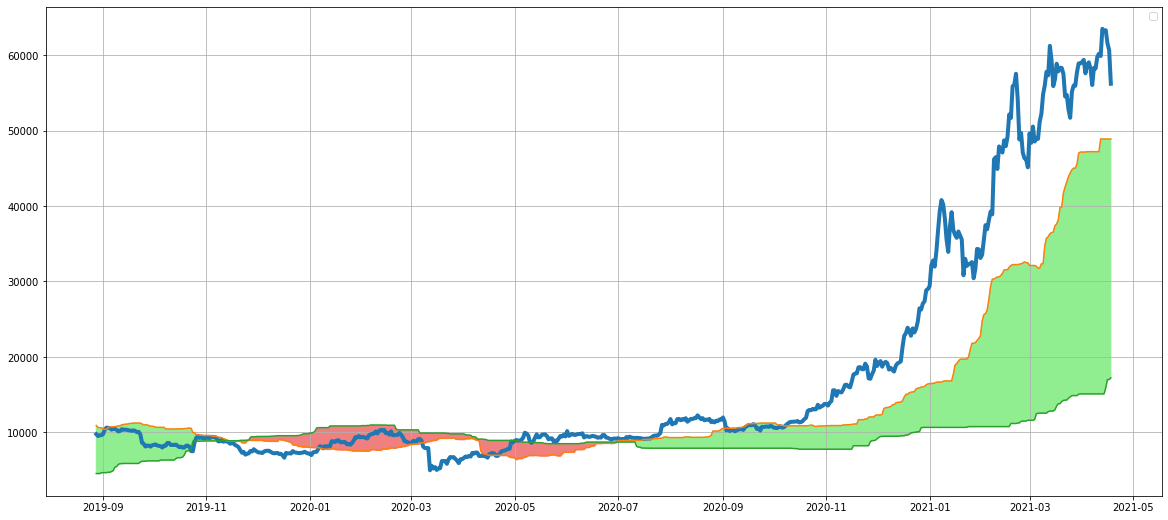

In [8]:
# Defina o comprimento do Tenkan Sen ou Linha de Conversão
cl_period  =  20 

# Definir comprimento de Kijun Sen ou linha de base
bl_period  =  60  

# Defina o comprimento de Senkou Sen B ou Leading Span B
lead_span_b_period  =  120  

# Defina o comprimento do intervalo de Chikou ou intervalo de atraso
lag_span_period  =  30  

# Calcular linha de conversão
high_20  =  df['High'].rolling(cl_period).max()
low_20  =  df['Low'].rolling(cl_period).min()
df['conversion_line'] = (high_20 + low_20)/2

# Calcular linha baseada
high_60 = df['High'].rolling(bl_period ).max()
low_60 = df['Low'].rolling(bl_period).min()
df['base_line'] = (high_60 + low_60)/2

# Calcular o intervalo principal A
df['lead_span_A'] = ((df.conversion_line + df.base_line)/2).shift(lag_span_period)

# Calcular o intervalo principal B
high_120 = df['High'].rolling(120).max()
low_120 = df['High'].rolling(120).min()
df['lead_span_B'] = ((high_120 + low_120)/2).shift(lead_span_b_period)

# Calcular período de atraso
df['lagging_span'] = df['Close'].shift(-lag_span_period )

# Retire os valores de NA do Dataframe
df.dropna(inplace = True)

# Adicionar objetos de figura e eixo
fig, ax  =  plt.subplots( 1, 1, sharex = True, figsize=(20, 9))

# Plot Close com índice no eixo x com uma espessura de linha de 4
ax.plot(df.index, df['Close'], linewidth=4)

# Plotagem do intervalo principal A com índice no eixo x compartilhado
ax.plot(df.index, df['lead_span_A'])

# Plotar o Span B com índice no eixo x sahred
ax.plot(df.index, df['lead_span_B'])

# Use o fill_between do objeto ax para especificar onde preencher
ax.fill_between(df.index, df['lead_span_A'], df['lead_span_B'],
                where=df['lead_span_A'] >=  df['lead_span_B'], color='lightgreen')

ax.fill_between(df.index, df['lead_span_A'], df['lead_span_B'],
                where = df['lead_span_A'] < df['lead_span_B'], color='lightcoral')

plt.legend(loc=0)
plt.grid()
plt.show()

Conclusão
A nuvem Ichimoku também é conhecida como Ichimoku Kinko Hyo . A nuvem Ichimoku é um indicador técnico para medir o momento, a tendência e a força da ação do preço usando cinco linhas e uma nuvem. O indicador tem pontos de crossover, assim como o MACD, para determinar os sinais de compra e venda.

Outros indicadores clássicos de momentum também podem ser usados ​​em conjunto com a nuvem Ichimoku para produzir sinais de compra e venda mais claros.

Os negociantes da nova era, programadores e analistas que desejam explorar os mercados de criptomoedas em ascensão devem aproveitar o poder da computação rápida para identificar oportunidades raras de negociação e automatizar sua negociação. Aprenda a usar técnicas quantitativas ensinadas por profissionais de mercado em nossa linha de aprendizado: negociação de criptomoedas para quants .